## **MACHINE LEARNING ASSIGNMENT 1 (GROUP D)**

1. Irfan Qayyim bin Abdul Mohaimin (2116843)
2. Ahmad Hazim bin Mohd Zin (2118511)
3. Mohammad Afiq Iz'aan bin Mohd Ali (2111977)
4. Muhammad Aiman Haris bin Muhamad Suwaid (2114229)



##**1. Understanding the Data**

In [51]:
import pandas as pd
import numpy as np

In [ ]:
acc_df = pd.read_csv("/data/US_Accidents_March23.csv")

In [53]:
acc_df.shape

(500000, 46)

In [54]:
pd.set_option('display.max_columns', None)
acc_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [55]:
pd.set_option('display.max_columns', None)
acc_df.describe(exclude="number")

,ID,Source,Start_Time,End_Time,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Wind_Direction,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,500000,500000,500000,500000,499999,499309,499981,500000,500000,499884,500000,499493,498554,492326,488803,488899,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,498517,498517,498517,498517
unique,500000,3,487027,493821,408146,88272,9488,1606,49,127804,1,4,1878,255623,24,108,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,A-2047758,Source1,2021-01-26 16:16:13,2021-11-22 08:00:00,A crash has occurred causing no to minimum del...,I-95 N,Miami,Los Angeles,CA,91761,US,US/Eastern,KCQT,2022-03-13 01:53:00,CALM,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,279623,20,11,592,4973,12141,34247,113274,720,500000,231397,7756,92,62259,166053,493809,499789,443747,497638,462993,498755,495680,499987,487002,485937,499534,425965,500000,344967,368274,392866,412242


##**2. Data Preprocessing**

In [56]:
# Finding missing values
print(acc_df.isna().sum().sort_values())

ID                            0
Amenity                       0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_Loop                  0
Country                       0
Bump                          0
Crossing                      0
County                        0
Source                        0
Severity                      0
Start_Time                    0
Distance(mi)                  0
End_Time                      0
State                         0
Start_Lng                     0
Start_Lat                     0
Description                   1
City                         19
Zipcode                     116
Timezone                    507
Street                      691
Airport_Code               1446
Sunrise_Sunset             1483
Civil_Tw

In [57]:
# Dropping missing values
acc_df = acc_df.dropna(subset=["Description", "City", "Zipcode", "Timezone",
                               "Street", "Airport_Code", "Sunrise_Sunset", "Civil_Twilight",
                               "Astronomical_Twilight", "Nautical_Twilight", "Weather_Timestamp", "Pressure(in)",
                               "Temperature(F)", "Weather_Condition", "Humidity(%)", "Wind_Direction",
                               "Visibility(mi)", "Wind_Speed(mph)", "Wind_Chill(F)", "Precipitation(in)",
                               "End_Lng", "End_Lat"])
print(acc_df.isna().sum().sort_values())

ID                       0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Visibility(mi)           0
Pressure(in)             0
Humidity(%)              0
Wind_Chill(F)            0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Nautical_Twilight        0
Description              0
City                     0
County                   0
S

In [58]:
# Copying the dataset
new_df = acc_df.copy()

In [59]:
# Transforming categorical values into numerical values
# Replacing new numerical values into the new dataset
from sklearn.preprocessing import LabelEncoder

le_id = LabelEncoder()
le_source = LabelEncoder()
le_stime = LabelEncoder()
le_etime = LabelEncoder()
le_desc = LabelEncoder()
le_street = LabelEncoder()
le_city = LabelEncoder()
le_county = LabelEncoder()
le_state = LabelEncoder()
le_zipcode = LabelEncoder()
le_country = LabelEncoder()
le_timezone = LabelEncoder()
le_aircode = LabelEncoder()
le_wtimestamp = LabelEncoder()
le_wdirection = LabelEncoder()
le_wcondition = LabelEncoder()
le_amenity = LabelEncoder()
le_bump = LabelEncoder()
le_crossing = LabelEncoder()
le_giveway = LabelEncoder()
le_junction = LabelEncoder()
le_noexit = LabelEncoder()
le_railway = LabelEncoder()
le_roundabout = LabelEncoder()
le_station = LabelEncoder()
le_stop = LabelEncoder()
le_tcalm = LabelEncoder()
le_tsignal = LabelEncoder()
le_turnloop = LabelEncoder()
le_sun = LabelEncoder()
le_ctwilight = LabelEncoder()
le_ntwilight = LabelEncoder()
le_atwilight = LabelEncoder()

new_df['ID'] = le_id.fit_transform(acc_df['ID'])
new_df['Source'] = le_source.fit_transform(acc_df['Source'])
new_df['Start_Time'] = le_stime.fit_transform(acc_df['Start_Time'])
new_df['End_Time'] = le_etime.fit_transform(acc_df['End_Time'])
new_df['Description'] = le_desc.fit_transform(acc_df['Description'])
new_df['Street'] = le_street.fit_transform(acc_df['Street'])
new_df['City'] = le_city.fit_transform(acc_df['City'])
new_df['County'] = le_county.fit_transform(acc_df['County'])
new_df['State'] = le_state.fit_transform(acc_df['State'])
new_df['Zipcode'] = le_zipcode.fit_transform(acc_df['Zipcode'])
new_df['Country'] = le_country.fit_transform(acc_df['Country'])
new_df['Timezone'] = le_timezone.fit_transform(acc_df['Timezone'])
new_df['Airport_Code'] = le_aircode.fit_transform(acc_df['Airport_Code'])
new_df['Weather_Timestamp'] = le_wtimestamp.fit_transform(acc_df['Weather_Timestamp'])
new_df['Wind_Direction'] = le_wdirection.fit_transform(acc_df['Wind_Direction'])
new_df['Weather_Condition'] = le_wcondition.fit_transform(acc_df['Weather_Condition'])
new_df['Amenity'] = le_amenity.fit_transform(acc_df['Amenity'])
new_df['Bump'] = le_bump.fit_transform(acc_df['Bump'])
new_df['Crossing'] = le_crossing.fit_transform(acc_df['Crossing'])
new_df['Give_Way'] = le_giveway.fit_transform(acc_df['Give_Way'])
new_df['Junction'] = le_junction.fit_transform(acc_df['Junction'])
new_df['No_Exit'] = le_noexit.fit_transform(acc_df['No_Exit'])
new_df['Railway'] = le_railway.fit_transform(acc_df['Railway'])
new_df['Roundabout'] = le_roundabout.fit_transform(acc_df['Roundabout'])
new_df['Station'] = le_station.fit_transform(acc_df['Station'])
new_df['Stop'] = le_stop.fit_transform(acc_df['Stop'])
new_df['Traffic_Calming'] = le_tcalm.fit_transform(acc_df['Traffic_Calming'])
new_df['Traffic_Signal'] = le_tsignal.fit_transform(acc_df['Traffic_Signal'])
new_df['Turning_Loop'] = le_turnloop.fit_transform(acc_df['Turning_Loop'])
new_df['Sunrise_Sunset'] = le_sun.fit_transform(acc_df['Sunrise_Sunset'])
new_df['Civil_Twilight'] = le_ctwilight.fit_transform(acc_df['Civil_Twilight'])
new_df['Nautical_Twilight'] = le_ntwilight.fit_transform(acc_df['Nautical_Twilight'])
new_df['Astronomical_Twilight'] = le_atwilight.fit_transform(acc_df['Astronomical_Twilight'])

In [60]:
# Shape of the new dataset
new_df.shape

(229927, 46)

In [61]:
# Making three new dataset for the three different tasks
# Task 1: Basic Feature Selection (seaborn)
# Task 2: Filter Feature Selection (Random Forest)
# Task 3: Feature Extraction (PCA)
task1_df = new_df.copy()
task2_df = new_df.copy()
task3_df = new_df.copy()

##**3. Task 1: No Feature Selection/Extraction**

In [62]:
# KNN where n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = new_df.drop('Severity', axis=1).values
y = new_df['Severity'].values
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)

print(confusion_matrix(y_test_knn, y_pred_knn))
print(classification_report(y_test_knn, y_pred_knn))

[[  175   271    42     3]
 [  183 64387   317   168]
 [   55   813   399    22]
 [   18  1599    82   445]]
              precision    recall  f1-score   support

           1       0.41      0.36      0.38       491
           2       0.96      0.99      0.97     65055
           3       0.47      0.31      0.37      1289
           4       0.70      0.21      0.32      2144

    accuracy                           0.95     68979
   macro avg       0.63      0.47      0.51     68979
weighted avg       0.94      0.95      0.94     68979



In [63]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = new_df.drop('Severity', axis=1).values
y = new_df['Severity'].values
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train_lr, y_train_lr)
y_pred_lr = lr.predict(X_test_lr)

print(mean_squared_error(y_test_lr, y_pred_lr, squared=False))
print(r2_score(y_test_lr, y_pred_lr))

0.3692578773419261
0.05767102076606845


Mean Squared Error (MSE): 0.3692578773419261


<ipython-input-64-e185c26e5641>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(knn_metrics.keys()), y=list(knn_metrics.values()), palette='viridis')
<ipython-input-64-e185c26e5641>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(linear_regression_metrics.keys()), y=list(linear_regression_metrics.values()), palette='viridis')


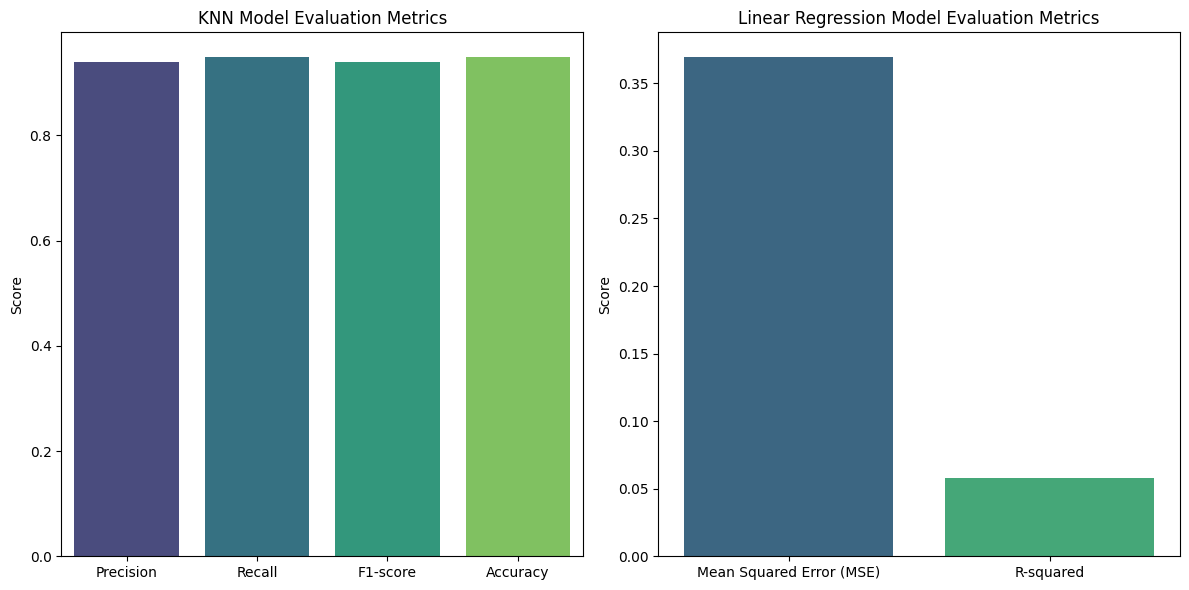

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics for KNN model
knn_report = classification_report(y_test_knn, y_pred_knn, output_dict=True)
knn_metrics = {
    "Precision": knn_report['weighted avg']['precision'],
    "Recall": knn_report['weighted avg']['recall'],
    "F1-score": knn_report['weighted avg']['f1-score'],
    "Accuracy": knn_report['accuracy']
}

# Evaluation metrics for Linear Regression model
lr_mse = mean_squared_error(y_test_lr, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test_lr, y_pred_lr)
linear_regression_metrics = {
    "Mean Squared Error (MSE)": lr_mse,
    "R-squared": lr_r2
}

print("Mean Squared Error (MSE):", lr_mse)

# Create bar plot for KNN metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(knn_metrics.keys()), y=list(knn_metrics.values()), palette='viridis')
plt.title('KNN Model Evaluation Metrics')
plt.ylabel('Score')

# Create bar plot for Linear Regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=list(linear_regression_metrics.keys()), y=list(linear_regression_metrics.values()), palette='viridis')
plt.title('Linear Regression Model Evaluation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

##**4. Task 2: Basic Feature Selection (seaborn)**

In [65]:
# Finding 0 variance
pd.set_option('display.max_columns', None)
task1_df.describe()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,229927.000000,229927.0,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.0,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.000000,229927.0,229927.000000,229927.000000,229927.000000,229927.000000
mean,114963.000000,0.0,2.074946,109805.989197,112824.549448,36.127844,-95.285065,36.128060,-95.284819,0.855868,89306.832190,31134.839623,3754.518343,738.658566,18.918422,35774.503729,0.0,1.485089,882.305427,63187.474046,61.034454,59.701000,63.781400,29.347562,9.052992,9.345418,7.441389,0.005658,22.842311,0.011412,0.000552,0.093225,0.003292,0.078051,0.002344,0.007768,0.000035,0.027826,0.026791,0.001018,0.091025,0.0,0.351472,0.310999,0.264662,0.226254
std,66374.352009,0.0,0.381777,63167.945107,65113.289031,5.344229,18.022022,5.344474,18.021684,1.926137,53008.715455,13334.263469,2047.083603,345.594813,15.230866,20064.761459,0.0,1.089305,455.110498,32855.994975,19.374310,21.661192,22.967414,1.141968,2.571770,7.055515,5.528371,0.046179,20.307221,0.106217,0.023496,0.290748,0.057285,0.268252,0.048360,0.087792,0.005899,0.164475,0.161473,0.031885,0.287645,0.0,0.477431,0.462903,0.441154,0.418407
min,0.000000,0.0,1.000000,0.000000,0.000000,24.574326,-124.497420,24.574505,-124.497419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-29.000000,-52.000000,1.000000,19.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,57481.500000,0.0,2.000000,55044.500000,56315.500000,33.212320,-117.571532,33.209535,-117.566774,0.067000,40999.500000,21046.500000,2039.000000,468.000000,3.000000,18798.000000,0.0,1.000000,462.000000,35107.000000,48.000000,46.000000,47.000000,29.190000,10.000000,2.000000,3.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,114963.000000,0.0,2.000000,109772.000000,112800.000000,36.045627,-87.432167,36.045479,-87.432103,0.264000,90079.000000,36190.000000,3970.000000,767.000000,14.000000,37083.000000,0.0,1.000000,937.000000,65029.000000,63.000000,63.000000,66.000000,29.720000,10.000000,9.000000,7.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,172444.500000,0.0,2.000000,164304.500000,169151.500000,40.134069,-80.215993,40.133192,-80.214688,0.926000,136258.500000,40612.000000,5445.000000,1010.000000,35.000000,54080.000000,0.0,3.000000,1287.000000,91155.500000,76.000000,76.000000,83.000000,29.960000,10.000000,15.000000,10.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000
max,229926.000000,0.0,4.000000,219645.000000,225738.000000,48.991585,-67.484130,48.998901,-67.484130,149.690000,178141.000000,50468.000000,7427.000000,1390.000000,48.000000,

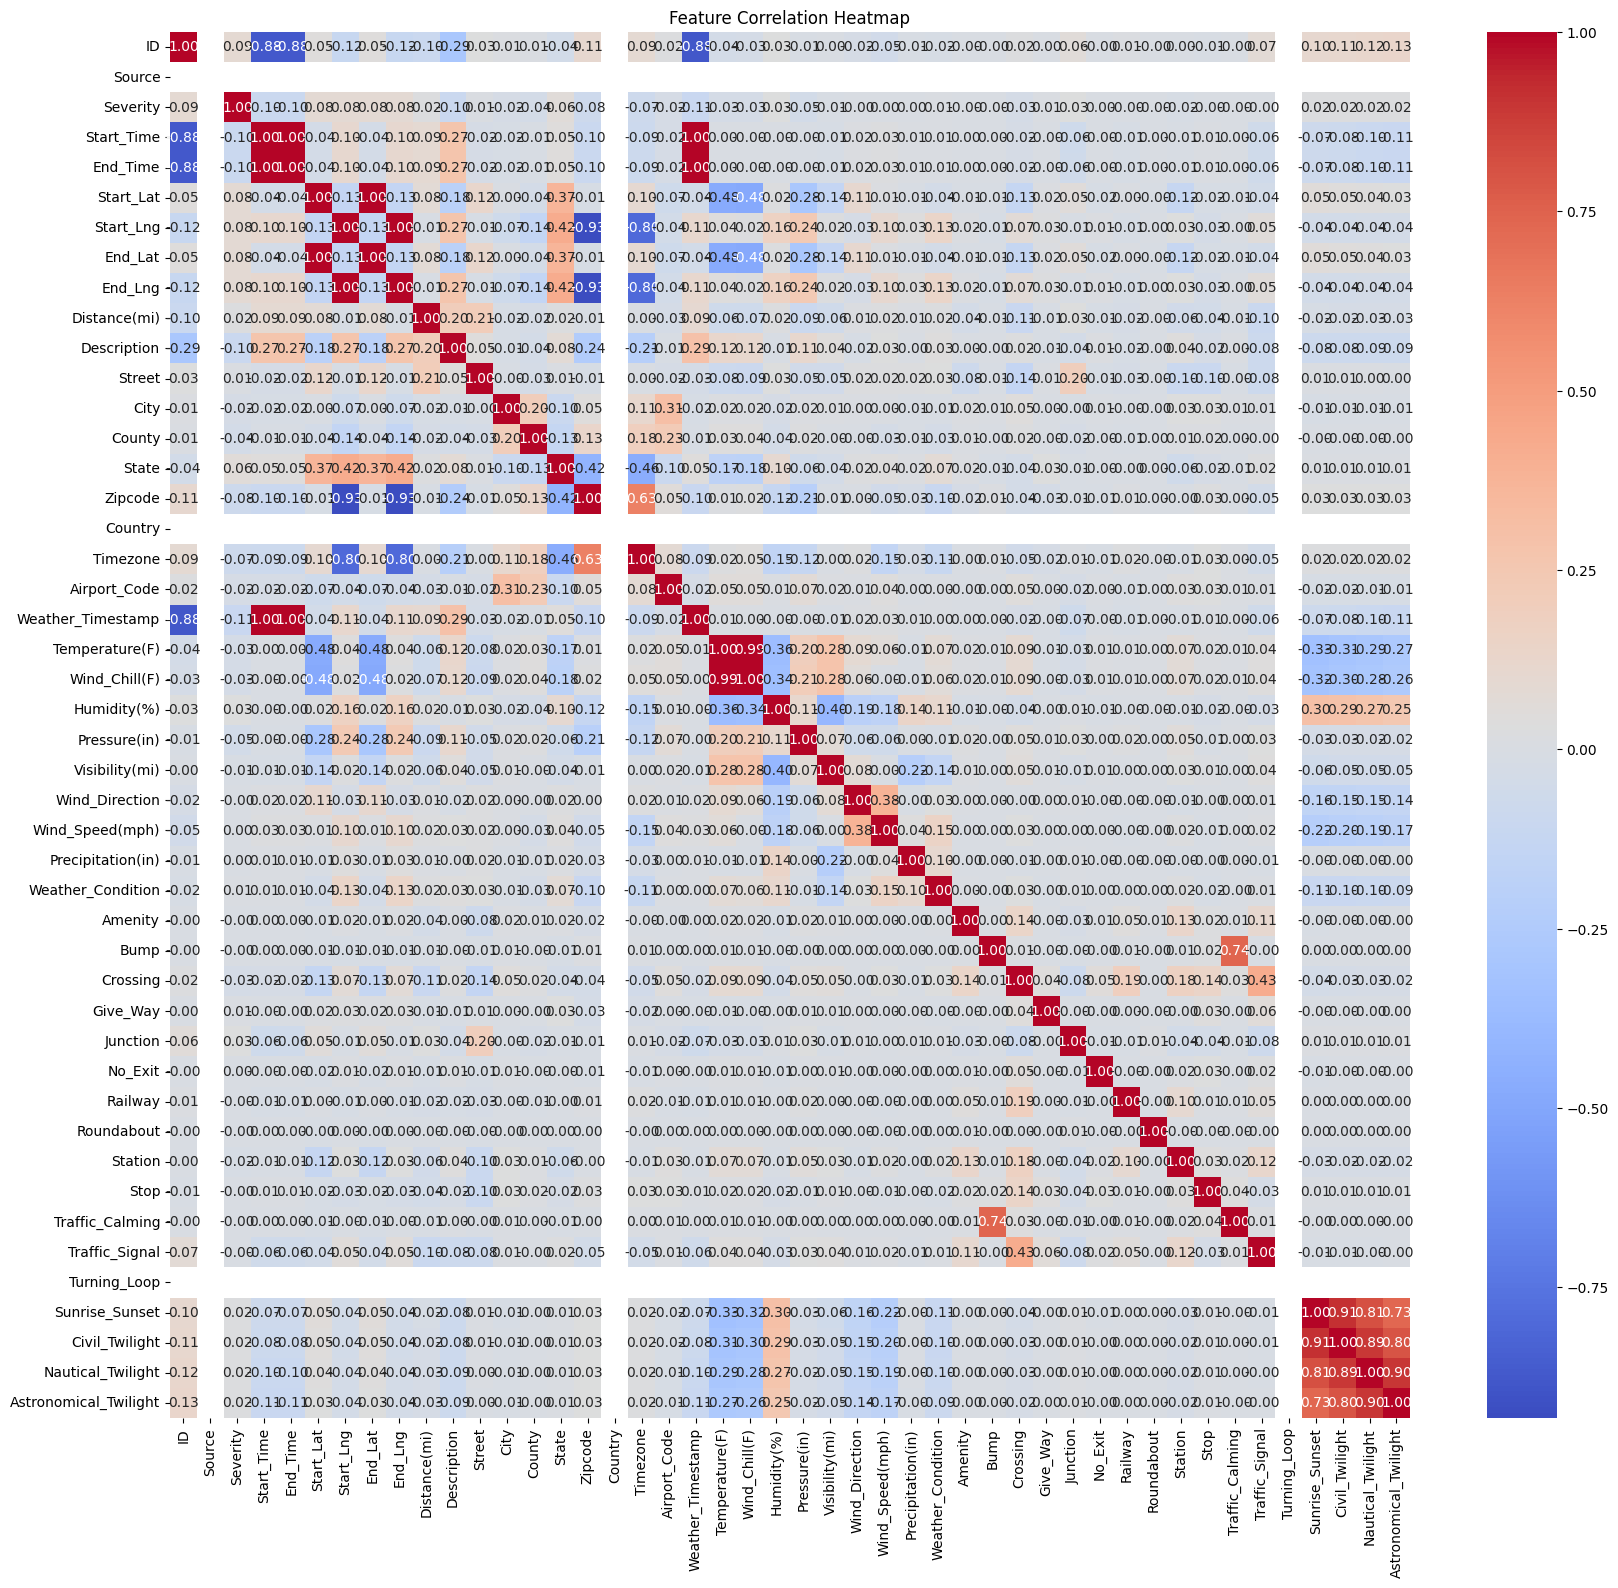

In [66]:
# Finding columns with high covariance using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr = task1_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation Heatmap')
plt.show()

In [67]:
# Drop column "Source, Country, Turning_Loop" as they have 0 variance
# Drop column "End_Time, End_Lat, End_Lng, Weather_Timestamp, Wind_Chill(F)"
task1_df = task1_df.drop(["Source", "Country", "Turning_Loop", "End_Time", "End_Lat", "End_Lng", "Weather_Timestamp", "Wind_Chill(F)"], axis=1)

In [68]:
# Double checking if the columns have been dropped
task1_df.shape

(229927, 38)

In [69]:
# KNN where n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X1 = task1_df.drop('Severity', axis=1).values
y1 = task1_df['Severity'].values
X_train_knn_1, X_test_knn_1, y_train_knn_1, y_test_knn_1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn_1, y_train_knn_1)
y_pred_knn_1 = knn.predict(X_test_knn_1)

print(confusion_matrix(y_test_knn_1, y_pred_knn_1))
print(classification_report(y_test_knn_1, y_pred_knn_1))

[[  177   269    42     3]
 [  195 64347   319   194]
 [   54   800   412    23]
 [   16  1580    71   477]]
              precision    recall  f1-score   support

           1       0.40      0.36      0.38       491
           2       0.96      0.99      0.97     65055
           3       0.49      0.32      0.39      1289
           4       0.68      0.22      0.34      2144

    accuracy                           0.95     68979
   macro avg       0.63      0.47      0.52     68979
weighted avg       0.94      0.95      0.94     68979



In [70]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X1 = task1_df.drop('Severity', axis=1).values
y1 = task1_df['Severity'].values
X_train_lr_1, X_test_lr_1, y_train_lr_1, y_test_lr_1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train_lr_1, y_train_lr_1)
y_pred_lr_1 = lr.predict(X_test_lr_1)

print(mean_squared_error(y_test_lr_1, y_pred_lr_1, squared=False))
print(r2_score(y_test_lr_1, y_pred_lr_1))

0.372430095696956
0.04141076697539803


Mean Squared Error (MSE): 0.3692578773419261


<ipython-input-71-8fa86f96f11c>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(knn_metrics_1.keys()), y=list(knn_metrics_1.values()), palette='viridis')
<ipython-input-71-8fa86f96f11c>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(linear_regression_metrics_1.keys()), y=list(linear_regression_metrics_1.values()), palette='viridis')


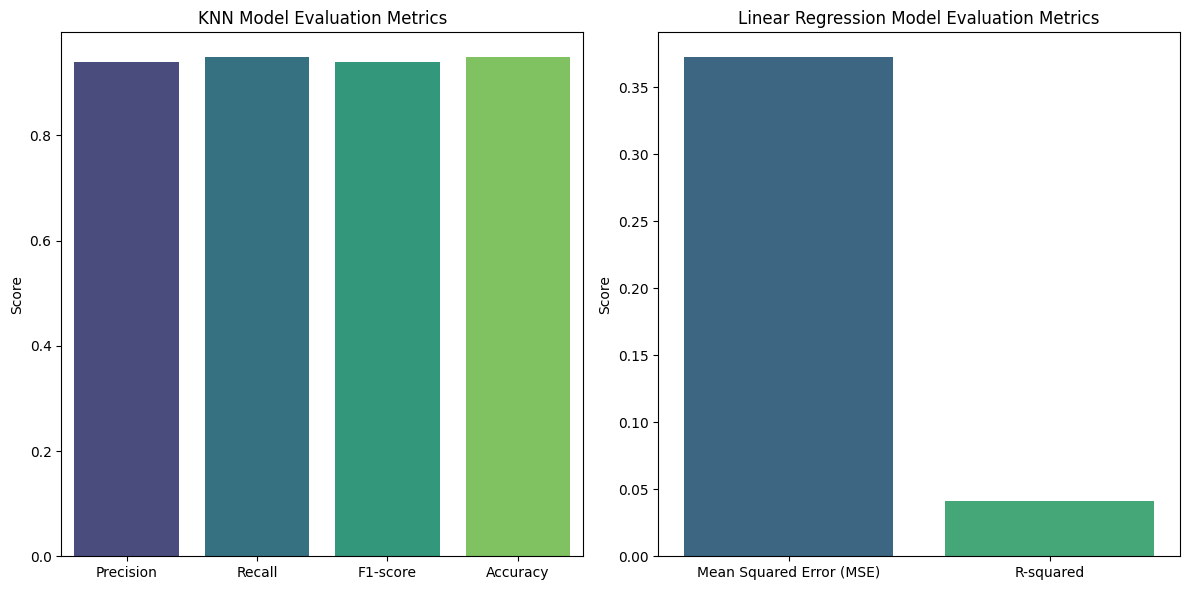

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics for KNN model
knn_report_1 = classification_report(y_test_knn_1, y_pred_knn_1, output_dict=True)
knn_metrics_1 = {
    "Precision": knn_report_1['weighted avg']['precision'],
    "Recall": knn_report_1['weighted avg']['recall'],
    "F1-score": knn_report_1['weighted avg']['f1-score'],
    "Accuracy": knn_report_1['accuracy']
}

# Evaluation metrics for Linear Regression model
lr_mse_1 = mean_squared_error(y_test_lr_1, y_pred_lr_1, squared=False)
lr_r2_1 = r2_score(y_test_lr_1, y_pred_lr_1)
linear_regression_metrics_1 = {
    "Mean Squared Error (MSE)": lr_mse_1,
    "R-squared": lr_r2_1
}

print("Mean Squared Error (MSE):", lr_mse)

# Create bar plot for KNN metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(knn_metrics_1.keys()), y=list(knn_metrics_1.values()), palette='viridis')
plt.title('KNN Model Evaluation Metrics')
plt.ylabel('Score')

# Create bar plot for Linear Regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=list(linear_regression_metrics_1.keys()), y=list(linear_regression_metrics_1.values()), palette='viridis')
plt.title('Linear Regression Model Evaluation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

##**5. Task 3: Filter Feature Selection (Random Forest)**

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Assuming 'new_df' is prepared and ready for feature selection and modeling

# Separate features and target
X = new_df.drop('Severity', axis=1)
y = new_df['Severity']

# Initialize a Random Forest classifier to use for feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest classifier
rf.fit(X, y)

# Select features based on importance
selector = SelectFromModel(rf, prefit=True, threshold='mean')  # Selects features with importance above the mean

# Transform X to select the most important features
X_selected = selector.transform(X)

# Update the DataFrame to keep only selected features
selected_features = X.columns[selector.get_support()]
X_selected_df = X[selected_features]

print(f"Selected features ({len(selected_features)}): {list(selected_features)}")

# Proceed with the train-test split using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features (19): ['ID', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'State', 'Zipcode', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)']


In [73]:
# KNN where n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# KNN Model Training and Testing with Selected Features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Model Evaluation:")
print(classification_report(y_test, y_pred_knn))

KNN Model Evaluation:
              precision    recall  f1-score   support

           1       0.40      0.36      0.38       491
           2       0.96      0.99      0.97     65055
           3       0.48      0.31      0.37      1289
           4       0.70      0.21      0.32      2144

    accuracy                           0.95     68979
   macro avg       0.63      0.47      0.51     68979
weighted avg       0.94      0.95      0.94     68979



In [74]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lr, squared=False)}")
print(f"R-squared: {r2_score(y_test, y_pred_lr)}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.36954430192794097
R-squared: 0.05620856926941886


Mean Squared Error (MSE): 0.36954430192794097


<ipython-input-75-5abff340412b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(knn_metrics.keys()), y=list(knn_metrics.values()), palette='viridis')
<ipython-input-75-5abff340412b>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(linear_regression_metrics.keys()), y=list(linear_regression_metrics.values()), palette='viridis')


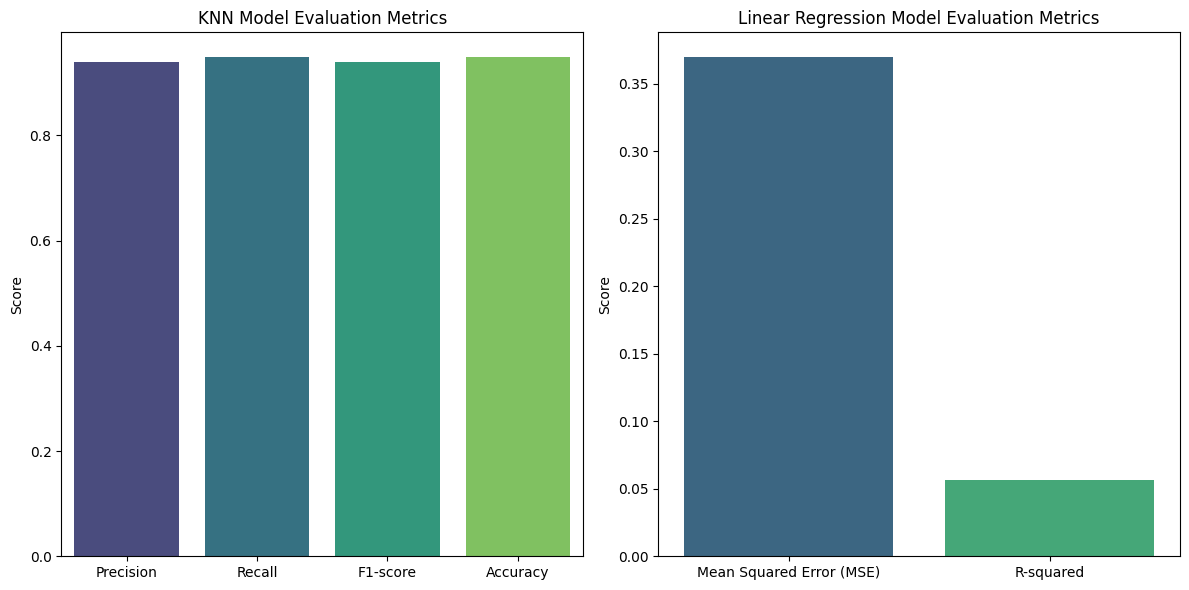

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics for KNN model
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
knn_metrics = {
    "Precision": knn_report['weighted avg']['precision'],
    "Recall": knn_report['weighted avg']['recall'],
    "F1-score": knn_report['weighted avg']['f1-score'],
    "Accuracy": knn_report['accuracy']
}

# Evaluation metrics for Linear Regression model
lr_mse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)
linear_regression_metrics = {
    "Mean Squared Error (MSE)": lr_mse,
    "R-squared": lr_r2
}

print("Mean Squared Error (MSE):", lr_mse)

# Create bar plot for KNN metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(knn_metrics.keys()), y=list(knn_metrics.values()), palette='viridis')
plt.title('KNN Model Evaluation Metrics')
plt.ylabel('Score')

# Create bar plot for Linear Regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=list(linear_regression_metrics.keys()), y=list(linear_regression_metrics.values()), palette='viridis')
plt.title('Linear Regression Model Evaluation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

##**6. Task 4: Feature Extraction (PCA)**

In [76]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
X = new_df.drop('Severity', axis=1)
X_standardized = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_standardized)


# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)

Explained variance ratio: [0.11536872 0.09950045 0.08343564 0.07079663 0.04270556 0.04071975
 0.03812758 0.0341256  0.03141051 0.02822171 0.025084   0.02481813
 0.02432407 0.02418367 0.02371227 0.02356785 0.02280282 0.02189047
 0.02122993 0.02019706 0.01914565 0.019116   0.01728878 0.01657423
 0.01638315 0.01582886 0.01397881 0.01305306 0.01192093]
Cumulative explained variance: [0.11536872 0.21486917 0.29830481 0.36910143 0.41180699 0.45252675
 0.49065433 0.52477993 0.55619044 0.58441215 0.60949615 0.63431429
 0.65863836 0.68282203 0.7065343  0.73010215 0.75290496 0.77479543
 0.79602536 0.81622241 0.83536807 0.85448406 0.87177285 0.88834708
 0.90473023 0.92055909 0.9345379  0.94759096 0.95951189]


In [77]:
X_pca.shape

(229927, 29)

In [78]:
X_train_pca_knn, X_test_pca_knn, y_train_knn, y_test_knn = train_test_split(X_pca, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca_knn, y_train_knn)
y_pred_pca_knn = knn.predict(X_test_pca_knn)

print(confusion_matrix(y_test_knn, y_pred_pca_knn))
print(classification_report(y_test_knn, y_pred_pca_knn))

[[  147   325    15     4]
 [  118 64603   242    92]
 [   22   960   290    17]
 [   15  2020    55    54]]
              precision    recall  f1-score   support

           1       0.49      0.30      0.37       491
           2       0.95      0.99      0.97     65055
           3       0.48      0.22      0.31      1289
           4       0.32      0.03      0.05      2144

    accuracy                           0.94     68979
   macro avg       0.56      0.39      0.42     68979
weighted avg       0.92      0.94      0.93     68979



In [79]:
# Linear Regression Using X_pca
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X_train_pca_lr, X_test_pca_lr, y_train_lr, y_test_lr = train_test_split(X_pca, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train_pca_lr, y_train_lr)
y_pred_pca_lr = lr.predict(X_test_pca_lr)

print(mean_squared_error(y_test_lr, y_pred_pca_lr, squared=False))
print(r2_score(y_test_lr, y_pred_pca_lr))

0.37282052370903035
0.03939988618895007


Mean Squared Error (MSE): 0.37282052370903035


<ipython-input-80-a1da236a5192>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(knn_metrics.keys()), y=list(knn_metrics.values()), palette='viridis')
<ipython-input-80-a1da236a5192>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(linear_regression_metrics.keys()), y=list(linear_regression_metrics.values()), palette='viridis')


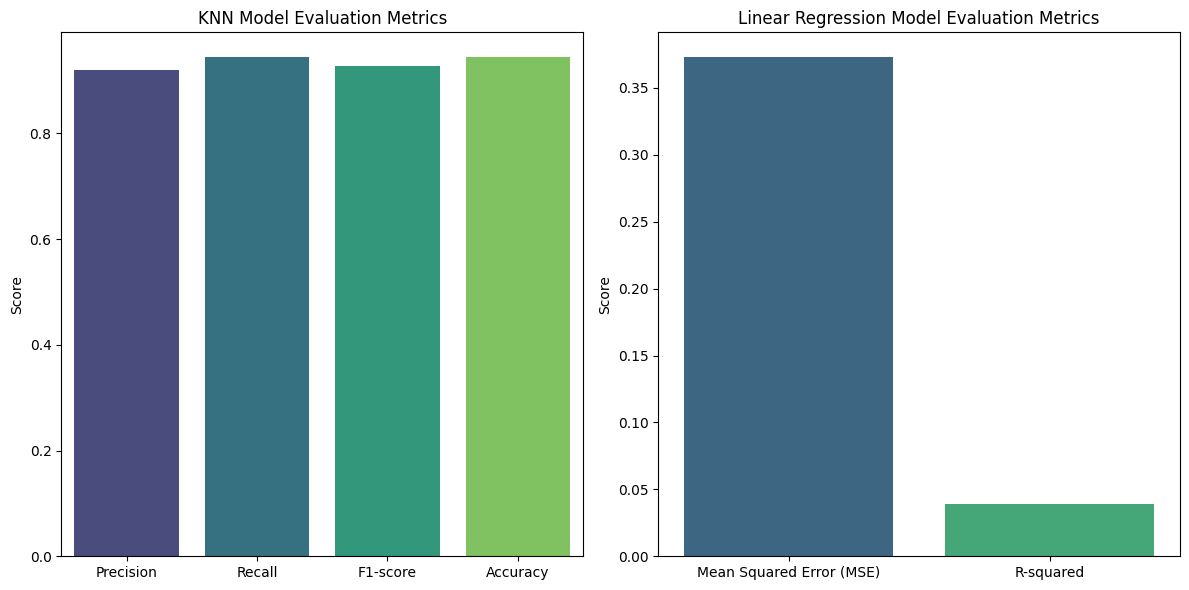

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics for KNN model
knn_report = classification_report(y_test_knn, y_pred_pca_knn, output_dict=True)
knn_metrics = {
    "Precision": knn_report['weighted avg']['precision'],
    "Recall": knn_report['weighted avg']['recall'],
    "F1-score": knn_report['weighted avg']['f1-score'],
    "Accuracy": knn_report['accuracy']
}

# Evaluation metrics for Linear Regression model
lr_mse = mean_squared_error(y_test_lr, y_pred_pca_lr, squared=False)
lr_r2 = r2_score(y_test_lr, y_pred_pca_lr)
linear_regression_metrics = {
    "Mean Squared Error (MSE)": lr_mse,
    "R-squared": lr_r2
}

print("Mean Squared Error (MSE):", lr_mse)

# Create bar plot for KNN metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=list(knn_metrics.keys()), y=list(knn_metrics.values()), palette='viridis')
plt.title('KNN Model Evaluation Metrics')
plt.ylabel('Score')

# Create bar plot for Linear Regression metrics
plt.subplot(1, 2, 2)
sns.barplot(x=list(linear_regression_metrics.keys()), y=list(linear_regression_metrics.values()), palette='viridis')
plt.title('Linear Regression Model Evaluation Metrics')
plt.ylabel('Score')

plt.tight_layout()
plt.show()